In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## samples, multimodal mixture gaussian
N = 1000
theta1 = -3
theta2 = 3
z = np.random.choice(2, N, p=[0.5,0.5])
X = np.zeros((N, 1))

for i in range(N):
    if z[i] == 1:
        X[i] = np.random.randn(1) + theta1
    else:
        X[i] = np.random.randn(1) + theta2

In [3]:
import autograd.numpy as np
from autograd import jacobian

def log_prior(theta):
    return(-(1/(2*10))*theta.T@theta)
          
def log_lik(theta, x):
    return(np.log(0.5 * np.exp(-0.5*(theta[0]-x)**2) + 0.5* np.exp(-0.5*(theta[1]-x)**2)))
    
def U(theta, x, scale):
    return(-log_prior(theta) - scale*np.sum(log_lik(theta, x)))

gradU = jacobian(U, argnum=0)

In [4]:
from preprocess import create_batch

batches = create_batch(X, 10)

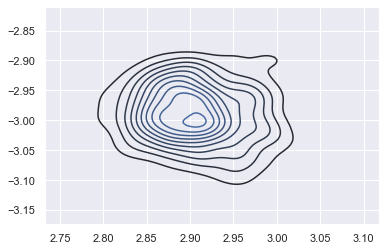

In [5]:
from sghmc import sghmc

samples = sghmc(gradU, X, 100, np.array([.0, .0]))
sns.set()
sns.kdeplot(samples[:,0], samples[:,1])
pass